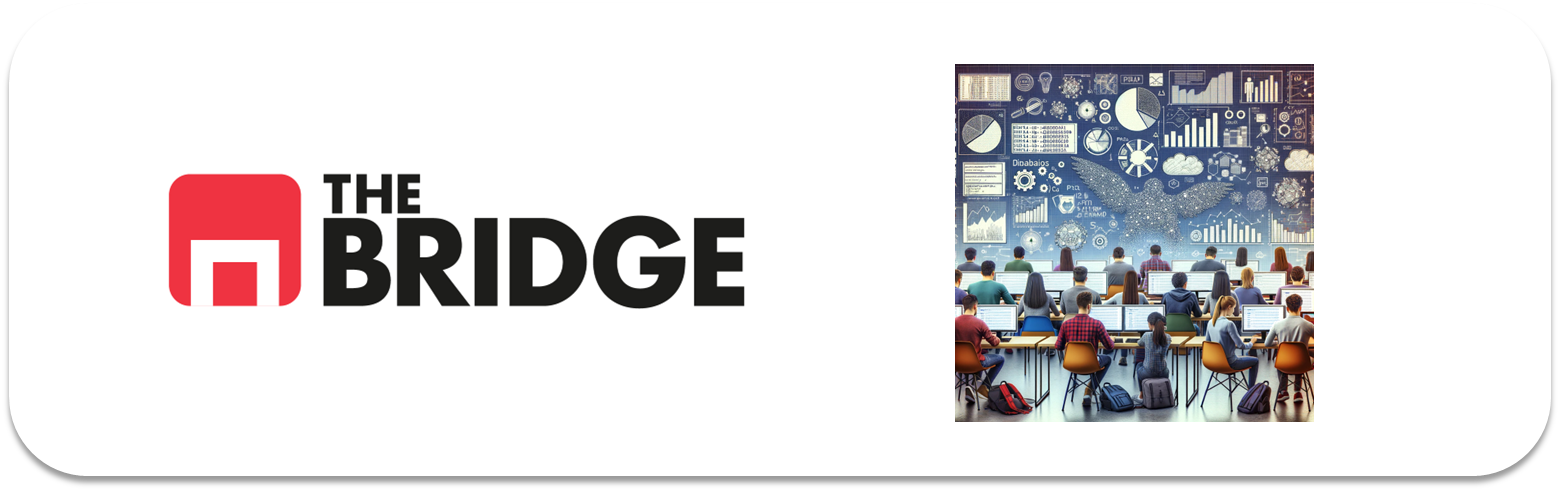

## PRACTICA OBLIGATORIA: **Clasificacion y Regresion Logistica**

* La práctica obligatoria de esta unidad consiste en modelar la supervivencia en el Titanic, por fin, además de una parte adicional multiclase. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión logística, evaluarlo contra un dataset de test reservado del original mostrando las métricas propias de los problemas de clasificación, la matriz de confusión y la curva ROC. Además se pide comparar las predicciones con los valores reales y al final adaptar el modelo a un problema multiclase.

Los pasos para guiar el trabajo:
1. Carga el dataset del Titanic. 
2. Deshazte de las variables que no vayas a usar. Limpia lo que creas necesarios pero no hagas imputaciones.
3. Escoge y analiza la variable target de forma gráfica y razona sobre el impacto de la distribución en los resultados esperados. Ten en cuenta que lo que queremos es poder predecir si un pasajero sobrevivirá.
4. Haz el split en train y test que creas conveniente pero asegurándote que ambos conjuntos tienen un reparto similar de pasajeros embarcados en las tres ciudades.
5. Construye las parejas X,y de train y test.
6. Ahora sí imputa los nulos con medias y modas en la X de train. Guarda esas medias que necesitarás en la parte de test.
7. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
8. Trata las variables para que funcionen lo mejor posible en el modelo.
9. Construye un modelo de regresión logística.
10. EXTRA: Analiza si lo crees conveniente los pesos y la importancia de las features.
11. Procesa el dataset de Test para que puedas usarlo en la evaluación 
12. Evalúa tu modelo contra el dataset de test y train. Obten las matrices de confusión y las métricas que creas adecuadas. Haz un pequeño assesment de su generabilidad.
13. EXTRA: Halla la probabilidad de supervivencia de un hombre de entre 30 y 40 años, que embarcó en Southampton en segunda clase, viajaba solo y no pagó el billete. PISTA: En este caso tendrás que calcular varias probabilidades y hacer la media de ellas.
14. EXTRA: Aprovecha todo el trabajo haciendo un único cambio en el target, ahora será la clase del viajero. Cambia el target quitándolo de X_train, X_test y añade a estos el target anterior. El resto no deberías cambiarlo. Entrena y evalua el modelo sólo con el classification_report.  



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB
None
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male 

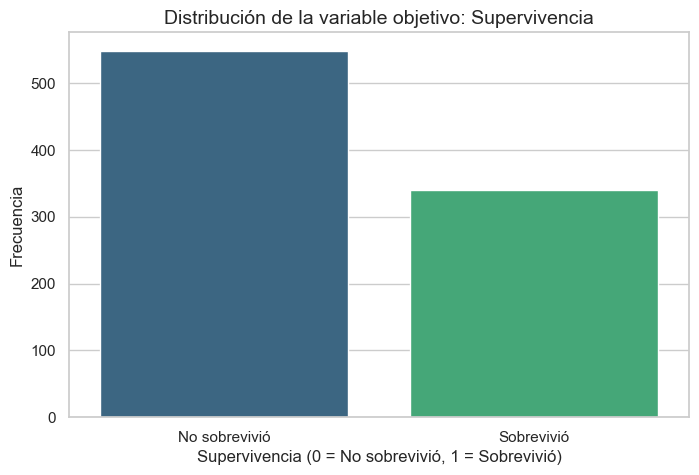

Porcentaje de supervivencia: 38.25%
Distribución en entrenamiento:
embarked_Q    0.082982
embarked_S    0.734177
dtype: float64

Distribución en prueba:
embarked_Q    0.101124
embarked_S    0.685393
dtype: float64
pclass        0
age           0
sibsp         0
parch         0
fare          0
sex_male      0
embarked_Q    0
embarked_S    0
dtype: int64
pclass        0
age           0
sibsp         0
parch         0
fare          0
sex_male      0
embarked_Q    0
embarked_S    0
dtype: int64
Correlaciones con la supervivencia:
 survived      1.000000
fare          0.269784
parch         0.074995
embarked_Q    0.056954
sibsp        -0.018486
age          -0.081217
embarked_S   -0.161777
pclass       -0.329121
sex_male     -0.551333
Name: survived, dtype: float64


C:\Users\DMIN\AppData\Local\Temp\ipykernel_16740\103934143.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=correlations.index, x=correlations.values, palette="viridis")


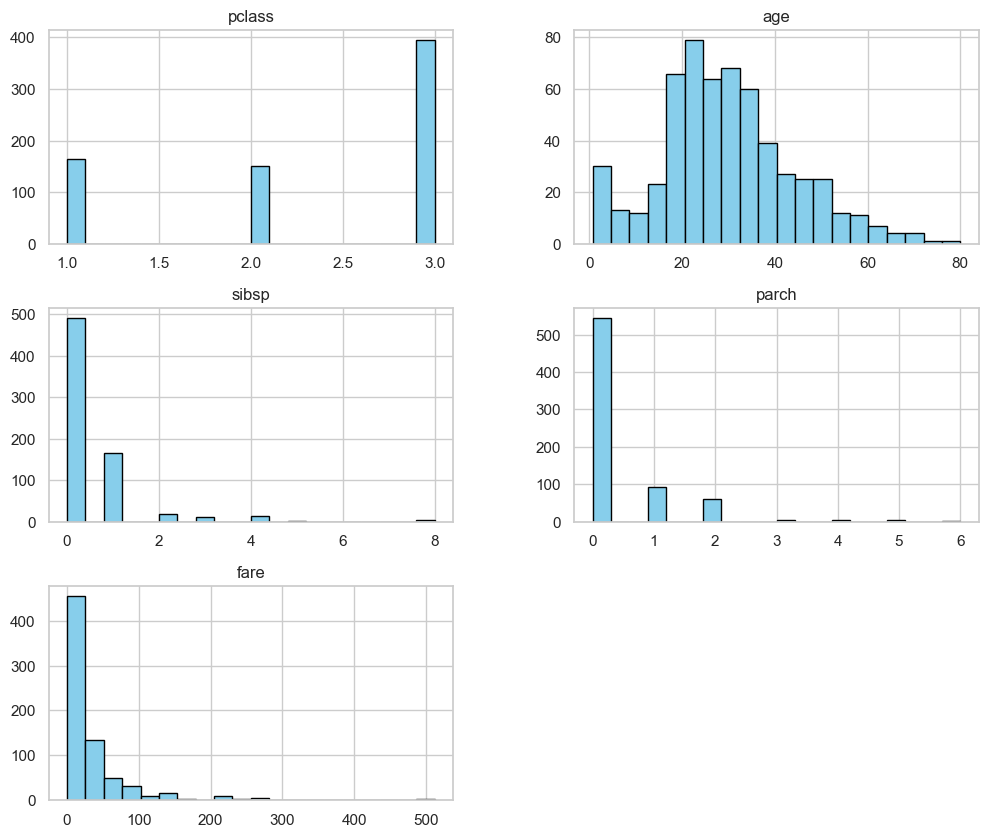

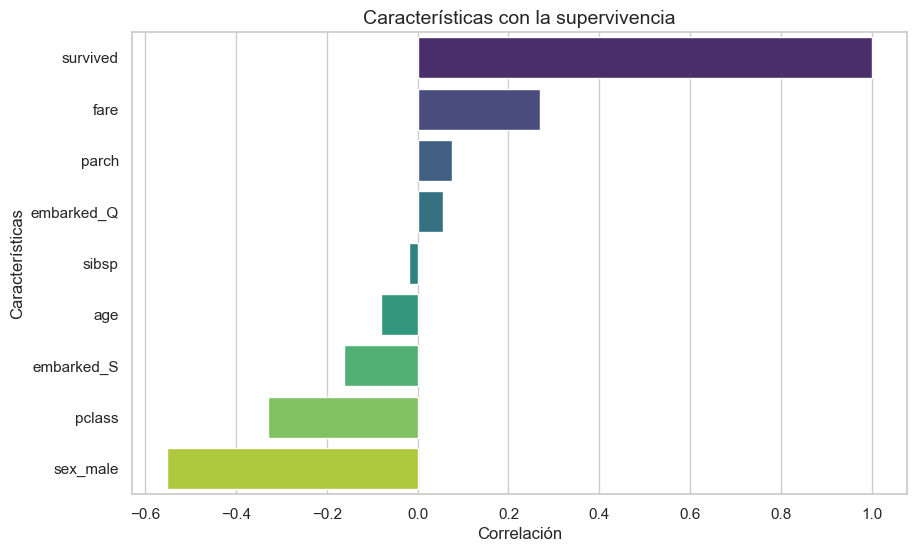

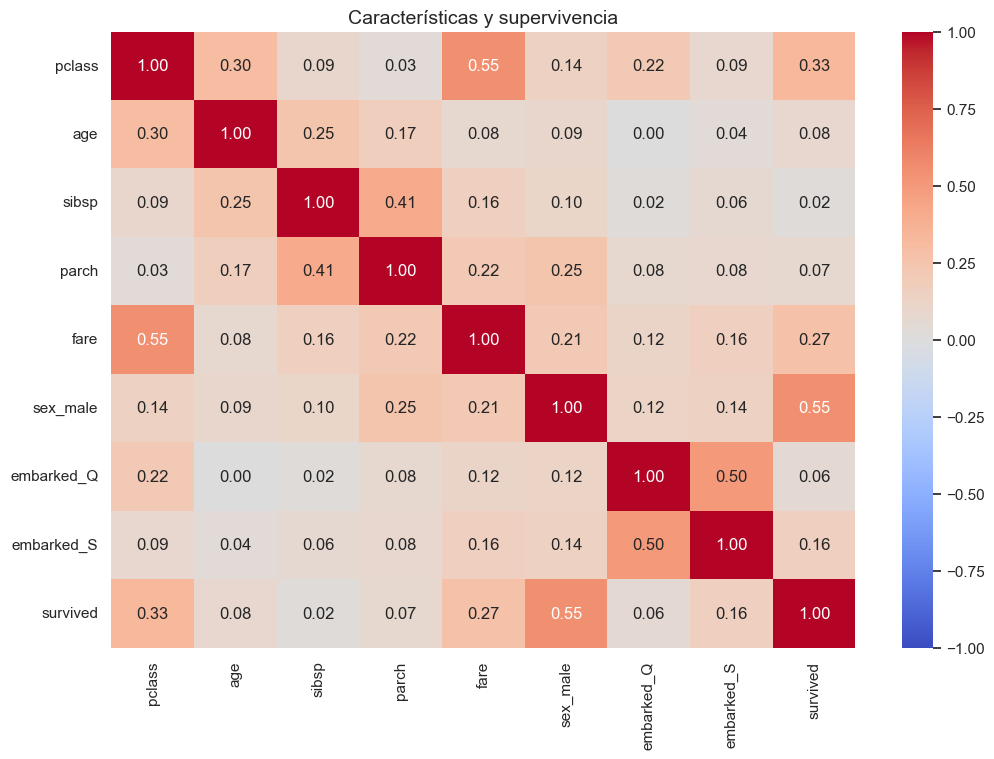

    Feature  Coefficient
2      fare     0.120651
4     parch    -0.187233
3       age    -0.410971
0    pclass    -0.835375
1  sex_male    -1.277743


,Predicción: 0,Predicción: 1
Clase Real: 0,94,16
Clase Real: 1,21,47


In [2]:
file_path = './data/titanic.csv'
titanic_data = pd.read_csv(file_path)

# Inspeccionar el dataset
print(titanic_data.info())
print(titanic_data.head())

# 2. Eliminar variables innecesarias y limpiar el dataset (sin imputaciones)
columns_to_drop = ['class', 'who', 'adult_male', 'alive', 'alone', 'deck', 'embark_town']
titanic_cleaned = titanic_data.drop(columns=columns_to_drop)

# Eliminar filas con valores nulos en 'embarked' (necesario para el split posterior)
titanic_cleaned = titanic_cleaned.dropna(subset=["embarked"])

# Mostrar las primeras filas para confirmar los cambios
print(titanic_cleaned.head())

# 3. Analizar la variable objetivo de forma gráfica
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.countplot(data=titanic_cleaned, x="survived", hue="survived", palette="viridis", legend=False)
plt.title("Distribución de la variable objetivo: Supervivencia", fontsize=14)
plt.xlabel("Supervivencia (0 = No sobrevivió, 1 = Sobrevivió)", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.xticks([0, 1], ["No sobrevivió", "Sobrevivió"])
plt.show()

# Calcular y mostrar porcentaje de supervivencia
survival_rate = titanic_cleaned["survived"].mean() * 100
print(f"Porcentaje de supervivencia: {survival_rate:.2f}%")

# 4. Realizar el split en train y test (asegurando proporciones de 'embarked')
X = titanic_cleaned.drop(columns=["survived"])
y = titanic_cleaned["survived"]

# Codificar variables categóricas
X_encoded = pd.get_dummies(X, columns=["sex", "embarked"], drop_first=True)

# Dividir datos asegurando distribución de la variable objetivo y 'embarked'
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

X_train.hist(figsize=(12, 10), bins=20, color='skyblue', ec='black')

# Verificar proporciones
print("Distribución en entrenamiento:")
print(X_train[["embarked_Q", "embarked_S"]].mean())
print("\nDistribución en prueba:")
print(X_test[["embarked_Q", "embarked_S"]].mean())

# 5. Imputar valores nulos con medias y modas (solo en el train)
impute_means = X_train.mean()
X_train_imputed = X_train.fillna(impute_means)
X_test_imputed = X_test.fillna(impute_means)

# Revisar si quedan valores NaN después de la imputación
print(X_train_imputed.isnull().sum())
print(X_test_imputed.isnull().sum())

# 6. Mini-EDA y selección de características

# Unir X_train_imputed y y_train para analizar correlaciones
train_combined = X_train_imputed.copy()
train_combined["survived"] = y_train

# Calcular correlaciones con la variable objetivo
correlations = train_combined.corr()["survived"].sort_values(ascending=False)
print("Correlaciones con la supervivencia:\n", correlations)

# Visualizar correlaciones
plt.figure(figsize=(10, 6))
sns.barplot(y=correlations.index, x=correlations.values, palette="viridis")
plt.title("Características con la supervivencia", fontsize=14)
plt.xlabel("Correlación", fontsize=12)
plt.ylabel("Características", fontsize=12)
plt.show()

# Calcular las correlaciones
correlation_matrix = train_combined.corr().abs()

# Visualizar las correlaciones con un heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, cbar=True)
plt.title("Características y supervivencia", fontsize=14)
plt.show()

# Justificación de selección de características:
# 1. 'sex_male': Fuertemente correlacionada con la supervivencia (-0.54). Esto coincide con el contexto histórico del Titanic.
# 2. 'pclass': La clase económica también tiene una fuerte correlación con la supervivencia (-0.33), lo que refleja las diferencias en acceso a recursos.
# 3. 'fare': El costo del boleto (0.26) puede indicar posición socioeconómica.
# 4. 'age': Tiene una menor correlación (-0.08) pero es significativa, ya que los niños tenían prioridad en el rescate.
# 5. 'parch': Representa el número de familiares a bordo (0.08), lo que puede influir en las decisiones durante el rescate.

features_selected = ["pclass", "sex_male", "fare", "age", "parch"]

# 7. Escalar las variables para el modelo
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed[features_selected])
X_test_scaled = scaler.transform(X_test_imputed[features_selected])

# 8. Construir el modelo de regresión logística
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Mostrar los coeficientes del modelo
coefficients = pd.DataFrame({
    "Feature": features_selected,
    "Coefficient": log_reg.coef_[0]
}).sort_values(by="Coefficient", ascending=False)
print(coefficients)

# 9. Evaluar el modelo (matriz de confusión, métricas, curva ROC)
y_test_pred = log_reg.predict(X_test_scaled)
y_test_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

conf_matrix_df = pd.DataFrame(conf_matrix, 
                              index=['Clase Real: 0', 'Clase Real: 1'], 
                              columns=['Predicción: 0', 'Predicción: 1'])

conf_matrix_df

Matriz de Confusión (Test):
 [[94 16]
 [21 47]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.82      0.85      0.84       110
           1       0.75      0.69      0.72        68

    accuracy                           0.79       178
   macro avg       0.78      0.77      0.78       178
weighted avg       0.79      0.79      0.79       178

AUC: 0.86


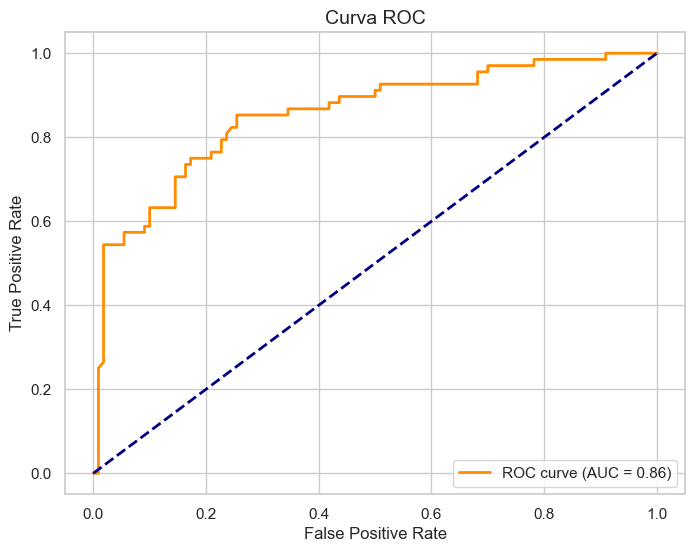

In [3]:
# Calcular la curva ROC y el AUC
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
roc_auc = auc(fpr, tpr)

# Mostrar resultados
print("Matriz de Confusión (Test):\n", conf_matrix)
print("\nReporte de Clasificación:\n", class_report)
print(f"AUC: {roc_auc:.2f}")

# Graficar curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})', color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Curva ROC', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend(loc="lower right")
plt.show()